# One neuron with BMC rule

In [54]:
from sys import prefix
sys.path.append(os.path.expanduser("~/auryn/tools/python/"))
sys.path.append("../ana")
from auryntools import *
import numpy as np
from scipy.io import mmread 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import plotly.graph_objects as go
from tools import *


In [50]:
win = signal.windows.hann(100)
conv=lambda x: np.convolve(x,win,'same')/ sum(win)

In [52]:
datadir = "/mnt/data1/data_paul/custom_plas/one_neuron/test_28jul"

rateE_av  = pd.read_csv("%s/output.%i.prate"%(datadir,0),delimiter=' ').values
time_axis = rateE_av[:,0]
rateE = rateE_av[:,1]

sse  = pd.read_csv("%s/output.%i.weight"%(datadir,0),delimiter=' ',comment='#' ).values[:,1:-1] 
sie  = pd.read_csv("%s/inh.%i.weight"%(datadir,0),delimiter=' ',comment='#' ).values[:,1:-1] 
#ras = pd.read_csv("%s/output.%i.ras"%(datadir,0),delimiter=' ',comment='#' ).values[:,:-1] 

In [40]:
cd /mnt/data1/data_paul/custom_plas/one_neuron/test_28jul

/mnt/data1/data_paul/custom_plas/one_neuron/test_28jul


In [41]:
ls

g_adapt1.0.state  inh.0.weight        output.0.prate   rf1.0.log
g_adapt2.0.state  in_pattern.0.state  output.0.ras     run_one.sh*
g_ampa.0.state    input.0.ras         output.0.weight  spiketrains_0
g_nmda.0.state    output.0.mem        pattern_times


In [42]:
cd /users/nsr/saighi/orchestratedSaighi/custom_plasticity

/export/home1/users/nsr/saighi/orchestratedSaighi/custom_plasticity


In [55]:
spkfiles  = ["%s/output.%i.ras"%(datadir,0)]
sfo = AurynBinarySpikeView(spkfiles)

Warning! Version mismatch between the decoding tool and the file version.
AurynBinarySpikeFile (0, 8, 1)
Fileversion (0, 8, 2)


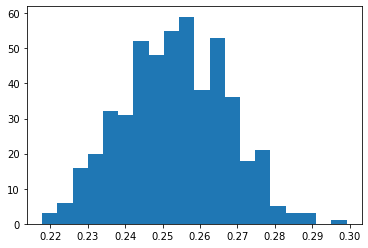

In [44]:
plt.hist(sse[-1,:],bins=20);

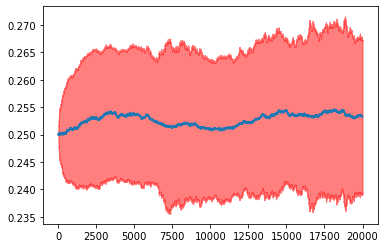

In [45]:

mean = np.mean(sse,axis = 1)
std = np.std(sse,axis = 1)
plt.plot(np.mean(sse,axis = 1))
plt.fill_between(np.linspace(0,len(mean),len(mean)),mean-std,mean+std,alpha=0.5,color ="red")

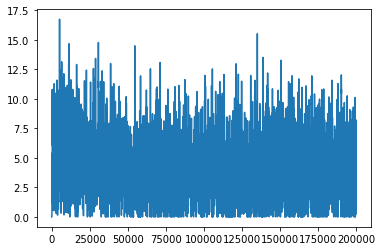

In [46]:
plt.plot(conv(rateE))

In [47]:
np.std(rateE[40000:])

19.31185741541688

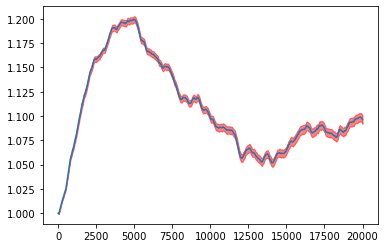

In [48]:
mean = np.mean(sie,axis = 1)
std = np.std(sie,axis = 1)
plt.plot(np.mean(sie,axis = 1))
plt.fill_between(np.linspace(0,len(mean),len(mean)),mean-std,mean+std,alpha=0.5,color ="red")

In [10]:
win = signal.windows.hann(10)
# plt.plot(time_axis_I,np.convolve(rateI,win,'same')/ sum(win),alpha = 0.75)
fig = go.Figure(data=go.Scatter( y=(np.convolve(rateE,win,'same')/ sum(win)) ))
#fig.add_trace(go.Scatter( y=excitatory["gampa"][0]))
fig.show()

In [ ]:
number_iter = 100
time_range = 100
nb_signal = 1
size_window = 0.2
procces_number = 1
starting_time = 1000
dure_simu = 2000
signals_times=0.1
nb_neurons=1
duree_pattern=

all_spikes_in_time,all_dist_in_time,all_times_in_time,all_data_in_time,times= parallelize(procces_number,number_iter,time_range,nb_signal,size_window,sfo,dure_simu,signals_times,nb_neurons,duree_pattern,starting_time)